## Quantitative segmentation performance

In [1]:
##Reproducing the quantitative segmentations performance

In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import warnings

from statannot import add_stat_annotation

#ignore some depr warnings
warnings.filterwarnings("ignore")


C:\Users\s.primakov\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\s.primakov\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\s.primakov\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
In C:\Users\s.primakov\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\s.primakov\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\s.primakov\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the '

In [3]:
#load data, test scores and pet class
#test data
metrics_test = pd.read_excel(r"./data/test_results_all_metrics.xlsx")
#val data
metrics_val = pd.read_excel(r"./data/val_results_all_metrics.xlsx")


### Performance with regards to complexity label

In [14]:
def plot_pet_fig(dice_test,bb_hue = 'pet',descr = 'Need PET, category',whis=1.5):
    ax = sns.boxplot(y='3d_dice',x = bb_hue,data = dice_test,width=0.4)
    #ax.set_yscale("log")
    plt.xticks(fontsize=14)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    p = sns.swarmplot(y='3d_dice',x = bb_hue,data=dice_test, size=4, edgecolor="black", linewidth=.9)
    sns.utils.axlabel(xlabel = descr, ylabel='volumetric DSC', fontsize=15)
    
    an = add_stat_annotation(ax,x =bb_hue,y ='3d_dice', data = dice_test, order=['0.0','1.0'], box_pairs=[('0.0','1.0')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.0 v.s. 1.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.0 v.s. 1.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
--------------------------------------------------------------------------------
Test median whole cohort: 0.85 0.15130600495383817
External validation median whole cohort: 0.8212692588409845 0.16895323831312714
--------------------------------------------------------------------------------
Test median (no pet): 0.8766826852716592 0.15653755123505886
External validation median (no pet): 0.8688734499579462 0.11798059160084684
------------------

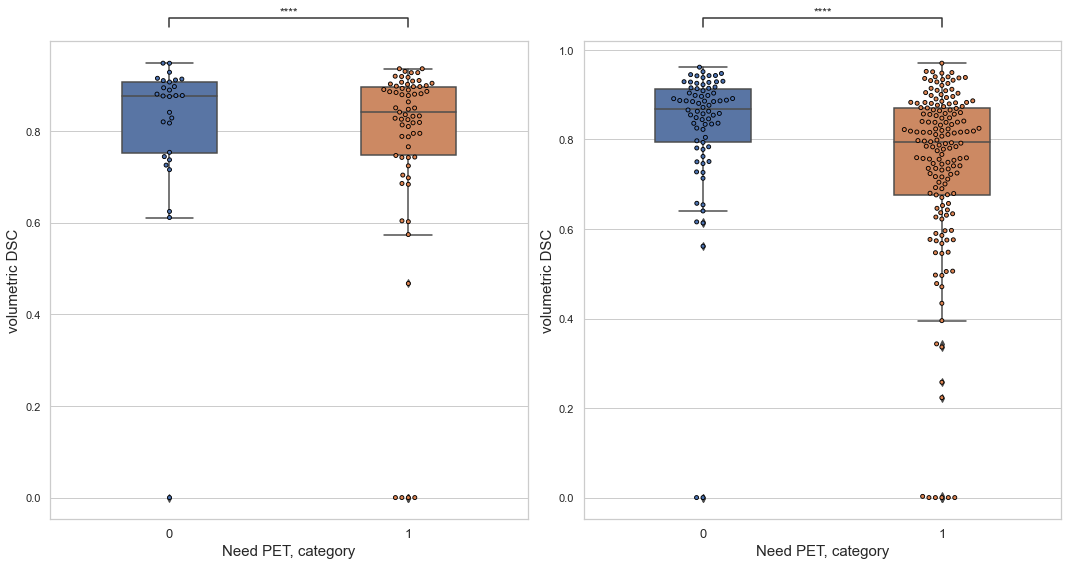

In [15]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
ax = plot_pet_fig(metrics_test)
plt.subplot(122)
plot_pet_fig(metrics_val)
plt.tight_layout()

print('-'*80)
print('Test median whole cohort:',np.median(metrics_test.loc[:,'3d_dice']),scipy.stats.iqr(metrics_test.loc[:,'3d_dice']))
print('External validation median whole cohort:',np.median(metrics_val.loc[:,'3d_dice']),scipy.stats.iqr(metrics_val.loc[:,'3d_dice']))
print('-'*80)
print('Test median (no pet):',np.median(metrics_test.loc[metrics_test['pet']==0,'3d_dice']),scipy.stats.iqr(metrics_test.loc[metrics_test['pet']==0,'3d_dice']))
print('External validation median (no pet):',np.median(metrics_val.loc[metrics_val['pet']==0,'3d_dice']),scipy.stats.iqr(metrics_val.loc[metrics_val['pet']==0,'3d_dice']))
print('-'*80)
print('Test median (need pet):',np.median(metrics_test.loc[metrics_test['pet']==1,'3d_dice']),scipy.stats.iqr(metrics_test.loc[metrics_test['pet']==1,'3d_dice']))
print('External validation median (need pet):',np.median(metrics_val.loc[metrics_val['pet']==1,'3d_dice']),scipy.stats.iqr(metrics_val.loc[metrics_val['pet']==1,'3d_dice']))


### Performance with regard to Atelectasis

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.0 v.s. 1.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.0 v.s. 1.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
--------------------------------------------------------------------------------
Test median whole cohort: 0.85 0.15130600495383817
External validation median whole cohort: 0.8212692588409845 0.16895323831312714
--------------------------------------------------------------------------------
Test median (no atelectasis): 0.8771929824561403 0.11150120411945075
External validation median (no atelectasis): 0.825497287522604 0.16239670983263
------

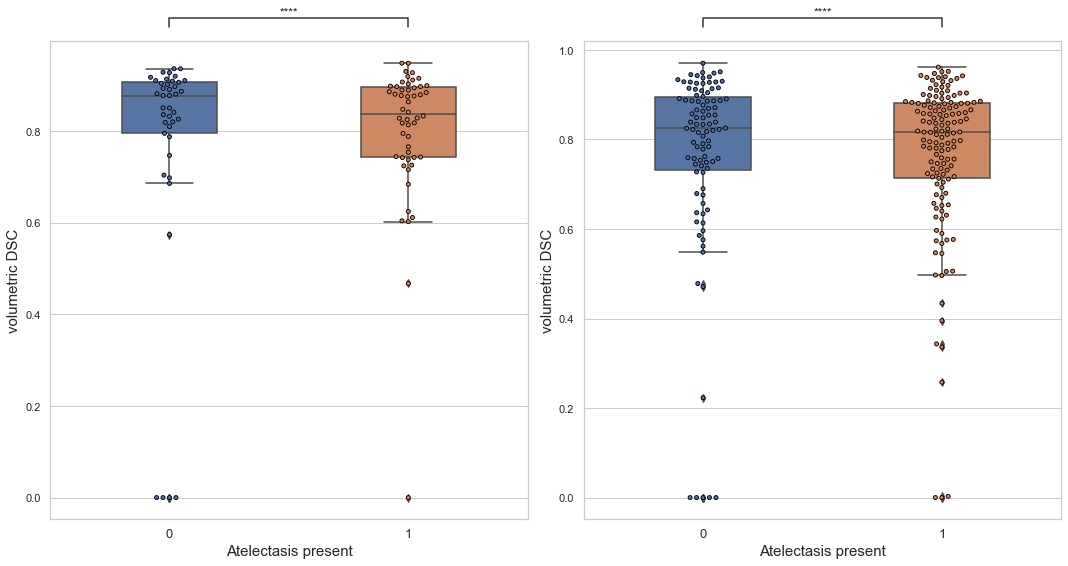

In [16]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
plot_pet_fig(metrics_test,'atelectasis', 'Atelectasis present')
plt.subplot(122)
plot_pet_fig(metrics_val,'atelectasis', 'Atelectasis present')
plt.tight_layout()

print('-'*80)
print('Test median whole cohort:',np.median(metrics_test.loc[:,'3d_dice']),scipy.stats.iqr(metrics_test.loc[:,'3d_dice']))
print('External validation median whole cohort:',np.median(metrics_val.loc[:,'3d_dice']),scipy.stats.iqr(metrics_val.loc[:,'3d_dice']))
print('-'*80)
print('Test median (no atelectasis):',np.median(metrics_test.loc[metrics_test['atelectasis']==0,'3d_dice']),scipy.stats.iqr(metrics_test.loc[metrics_test['atelectasis']==0,'3d_dice']))
print('External validation median (no atelectasis):',np.median(metrics_val.loc[metrics_val['atelectasis']==0,'3d_dice']),scipy.stats.iqr(metrics_val.loc[metrics_val['atelectasis']==0,'3d_dice']))
print('-'*80)
print('Test median (atelectasis):',np.median(metrics_test.loc[metrics_test['atelectasis']==1,'3d_dice']),scipy.stats.iqr(metrics_test.loc[metrics_test['atelectasis']==1,'3d_dice']))
print('External validation median (atelectasis):',np.median(metrics_val.loc[metrics_val['atelectasis']==1,'3d_dice']),scipy.stats.iqr(metrics_val.loc[metrics_val['atelectasis']==1,'3d_dice']))


### Performance with regards to a tumor location

In [17]:
def cluster_tum_loc(m_m):
    par,med,chest = [],[],[]
    for i,j in enumerate(list(m_m["tum_loc"].values)):
        if str(j) == '0':
            par.append(m_m.iloc[i]['3d_dice'])
        if re.search('1',str(j)):
            med.append(m_m.iloc[i]['3d_dice'])
        if re.search('2',str(j)) and  not re.search('1',str(j)):
            chest.append(m_m.iloc[i]['3d_dice'])
        
    return {'Parenchyma':par,'Mediastinum':med,'Chest wall inv.':chest}

mixed_model_test = metrics_test.copy()
mixed_model_val = metrics_val.copy()
dice_tum_loc_test = cluster_tum_loc(mixed_model_test)
dice_tum_loc_val = cluster_tum_loc(mixed_model_val)
##converting to a dataframe
dice_tum_loc_test = pd.DataFrame.from_dict(dice_tum_loc_test, orient='index').T
dice_tum_loc_val = pd.DataFrame.from_dict(dice_tum_loc_val, orient='index').T

In [18]:
def plot_dice_reg_tum_loc(mixed_mod):
    sns.set(context='notebook', style='whitegrid')
    ax = sns.boxplot(order=['Parenchyma','Mediastinum','Chest wall inv.'], data = mixed_mod,width=0.5)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    p = sns.swarmplot(order=['Parenchyma','Mediastinum','Chest wall inv.'], data=mixed_mod, size=4,alpha=0.8, edgecolor="black", linewidth=.9)
    sns.utils.axlabel(xlabel='tumor location ', ylabel='volumetric DSC', fontsize=15)

    an = add_stat_annotation(ax, data = mixed_mod, order=['Parenchyma','Mediastinum','Chest wall inv.'], box_pairs=[('Parenchyma','Mediastinum'),('Mediastinum','Chest wall inv.'),('Parenchyma','Chest wall inv.')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Parenchyma v.s. Mediastinum: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.800e-01 U_stat=4.615e+02
Mediastinum v.s. Chest wall inv.: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.235e+02
Parenchyma v.s. Chest wall inv.: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.514e-01 U_stat=2.605e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Parenchyma v.s. Mediastinum: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.203e-01 U_stat=3.411e+03
Mediastinum v.s. Chest wall inv.: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.161e-05 U_stat=2.019e+03
Parenchyma v.s. Chest w

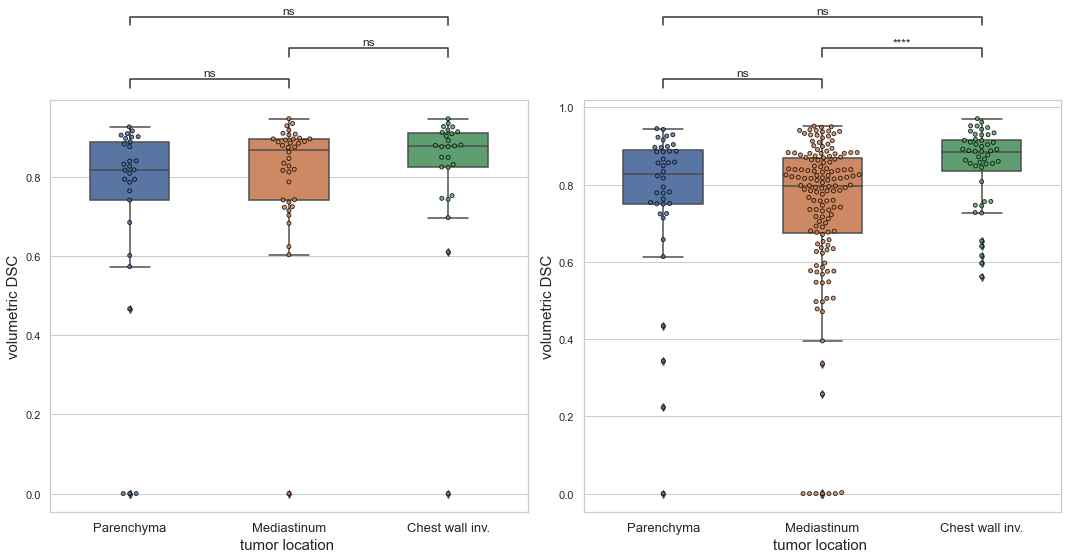

In [19]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
plot_dice_reg_tum_loc(dice_tum_loc_test)
plt.subplot(122)
plot_dice_reg_tum_loc(dice_tum_loc_val)
plt.tight_layout()
plt.savefig('tum_loc.png')

print('-'*80)
print('Test median whole cohort:', np.median(metrics_test.loc[:,'3d_dice']))
print('External validation median whole cohort:',np.median(metrics_val.loc[:,'3d_dice']))
print('-'*80)
print('Test median Parenchyma:', np.median(dice_tum_loc_test.Parenchyma.dropna()),scipy.stats.iqr(dice_tum_loc_test.Parenchyma.dropna()))
print('External validation median Parenchyma:',np.median(dice_tum_loc_val.Parenchyma.dropna()),scipy.stats.iqr(dice_tum_loc_val.Parenchyma.dropna()))
print('-'*80)
print('Test median Mediastinum:', np.median(dice_tum_loc_test.Mediastinum.dropna()),scipy.stats.iqr(dice_tum_loc_test.Mediastinum.dropna()))
print('External validation median Mediastinum:',np.median(dice_tum_loc_val.Mediastinum.dropna()),scipy.stats.iqr(dice_tum_loc_val.Mediastinum.dropna()))
print('-'*80)
print('Test median Chest wall involvement:', np.median(dice_tum_loc_test['Chest wall inv.'].dropna()),scipy.stats.iqr(dice_tum_loc_test['Chest wall inv.'].dropna()))
print('External validation median Chest wall involvement:',np.median(dice_tum_loc_val['Chest wall inv.'].dropna()),scipy.stats.iqr(dice_tum_loc_val['Chest wall inv.'].dropna()))



### Performance with regards to a Slice Thickness value

In [20]:
def cluster_sl_thickness(m_m):
    for i,j in enumerate(list(m_m["sl_th"].values)):
        if j< 2.5:
            m_m.loc[i,'sl_th'] = '[0;2.5)'
        elif j>= 2.5 and j<5:
            m_m.loc[i,'sl_th'] = '[2.5;5)'
        elif j>= 5:
            m_m.loc[i,'sl_th'] = '[5;7.5)'
        
    return m_m

mixed_model_test = metrics_test.copy()
mixed_model_val = metrics_val.copy()
mixed_model = cluster_sl_thickness(mixed_model_test)
mixed_model_val = cluster_sl_thickness(mixed_model_val)
    

In [21]:
def plot_dice_reg_sl_th(mixed_mod):
    sns.set(context='notebook', style='whitegrid')
    ax = sns.boxplot(y='3d_dice',x = 'sl_th',order=['[0;2.5)','[2.5;5)','[5;7.5)'],data = mixed_mod,width=0.5)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    p = sns.swarmplot(y='3d_dice',x = 'sl_th',order=['[0;2.5)','[2.5;5)','[5;7.5)'],data=mixed_mod, size=4,alpha=0.8, edgecolor="black", linewidth=.9)
    sns.utils.axlabel(xlabel='slice thickness [mm]', ylabel='volumetric DSC', fontsize=15)

    an = add_stat_annotation(ax,x ='sl_th',y ='3d_dice', data = mixed_mod, order=['[0;2.5)','[2.5;5)','[5;7.5)'], box_pairs=[('[0;2.5)','[5;7.5)'),('[2.5;5)','[5;7.5)')],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

[2.5;5) v.s. [5;7.5): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.010e+02
[0;2.5) v.s. [5;7.5): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.890e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

[2.5;5) v.s. [5;7.5): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.629e-03 U_stat=3.388e+03
[0;2.5) v.s. [5;7.5): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.832e-01 U_stat=2.620e+02
--------------------------------------------------------------------------------
Test median whole cohort: 0.85
Validation median whole cohort: 0.8212692588409845
-----------------------------

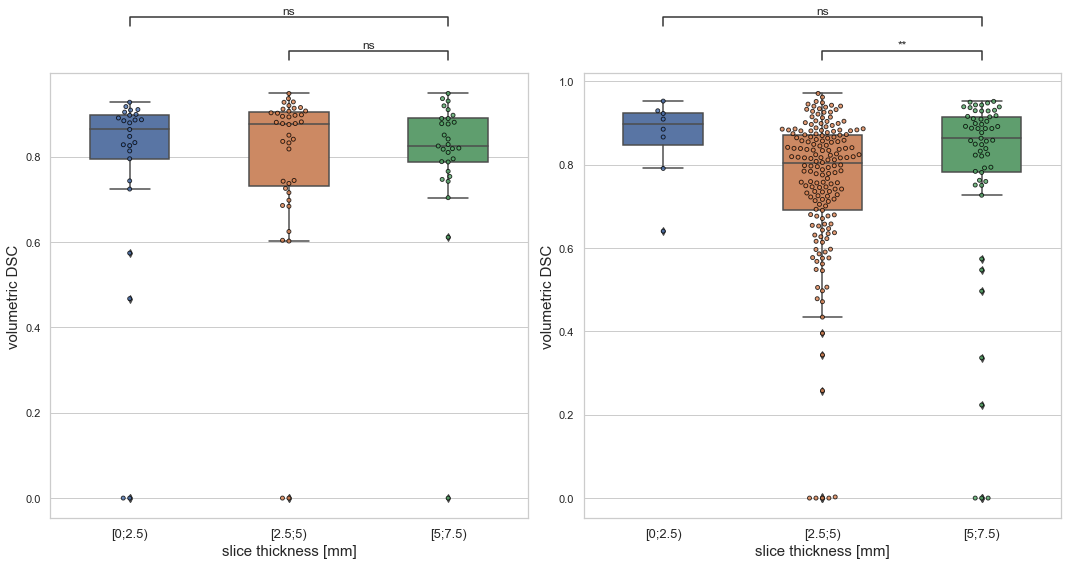

In [22]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
plot_dice_reg_sl_th(mixed_model)
plt.subplot(122)
plot_dice_reg_sl_th(mixed_model_val)
plt.tight_layout()

print('-'*80)
print('Test median whole cohort:',np.median(metrics_test.loc[:,'3d_dice']))
print('Validation median whole cohort:',np.median(metrics_val.loc[:,'3d_dice']))
print('-'*80)
print('Test median [0;2.5):',np.median(mixed_model.loc[mixed_model['sl_th']=='[0;2.5)','3d_dice']),scipy.stats.iqr(mixed_model.loc[mixed_model['sl_th']=='[0;2.5)','3d_dice']))
print('Validation median [0;2.5):',np.median(mixed_model_val.loc[mixed_model_val['sl_th']=='[0;2.5)','3d_dice']),scipy.stats.iqr(mixed_model_val.loc[mixed_model_val['sl_th']=='[0;2.5)','3d_dice']))
print('-'*80)
print('Test median [2.5;5):',np.median(mixed_model.loc[mixed_model['sl_th']=='[2.5;5)','3d_dice']),scipy.stats.iqr(mixed_model.loc[mixed_model['sl_th']=='[2.5;5)','3d_dice']))
print('Validation median [2.5;5):',np.median(mixed_model_val.loc[mixed_model_val['sl_th']=='[2.5;5)','3d_dice']),scipy.stats.iqr(mixed_model_val.loc[mixed_model_val['sl_th']=='[2.5;5)','3d_dice']))
print('-'*80)
print('Test median [5;7.5):',np.median(mixed_model.loc[mixed_model['sl_th']=='[5;7.5)','3d_dice']),scipy.stats.iqr(mixed_model.loc[mixed_model['sl_th']=='[5;7.5)','3d_dice']))
print('Validation median [5;7.5):',np.median(mixed_model_val.loc[mixed_model_val['sl_th']=='[5;7.5)','3d_dice']),scipy.stats.iqr(mixed_model_val.loc[mixed_model_val['sl_th']=='[5;7.5)','3d_dice']))



### Performance with regards to Tumor volume

In [23]:
#load data with tum_size
tum_vol_df = mixed_model_test.copy()
tum_vol_df_val = mixed_model_val.copy()
tv_thresholds=[20,150]

In [24]:
def plot_dice_reg_tum_vol(mixed_mod,hue=None):
    sns.set(context='notebook', style='whitegrid')
    
    ax = sns.boxplot(y='3d_dice',x = 'tum_vol',hue = hue, order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]],
                     data = mixed_mod,width=0.75)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    p = sns.swarmplot(y='3d_dice',x = 'tum_vol',hue = hue,
                      order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]],
                      data=mixed_mod, size=4,alpha=0.8, edgecolor="black", linewidth=.9,dodge=True)
    
   
    sns.utils.axlabel(xlabel='tumor size [ml]', ylabel='volumetric DSC', fontsize=15)

    an = add_stat_annotation(ax,x ='tum_vol',y ='3d_dice', data = mixed_mod, order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]],
                             box_pairs=[('<%s'%tv_thresholds[0],'>%s'%tv_thresholds[1]),('<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1])),('[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1])],#box_pairs=[(0,1)],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    
def plot_dice_reg_tum_vol_hue(mixed_mod,hue=None):
    sns.set(context='notebook', style='whitegrid')
    
    ax = sns.boxplot(y='3d_dice',x = 'tum_vol',hue = hue, order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]],
                     data = mixed_mod,width=0.75)

    plt.setp(ax.get_xticklabels(), fontsize=13)
    p = sns.swarmplot(y='3d_dice',x = 'tum_vol',hue = hue,
                      order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]],
                      data=mixed_mod, size=4,alpha=0.8, edgecolor="black", linewidth=.9,dodge=True)
    
   
    sns.utils.axlabel(xlabel='tumor size [ml]', ylabel='volumetric DSC', fontsize=15)

    an = add_stat_annotation(ax,x ='tum_vol',y ='3d_dice',hue =hue, data = mixed_mod, order=['<%s'%tv_thresholds[0],'[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1]], 
                             box_pairs=[(('<%s'%tv_thresholds[0],0),('<%s'%tv_thresholds[0],1)),(('[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),0),('[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),1)),
                                        (('>%s'%tv_thresholds[1],0),('>%s'%tv_thresholds[1],1)),(('>%s'%tv_thresholds[1],0),('<%s'%tv_thresholds[0],0)),
                                        (('>%s'%tv_thresholds[1],1),('<%s'%tv_thresholds[0],1)),(('>%s'%tv_thresholds[1],1),('[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),1))],#('[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'>%s'%tv_thresholds[1])],#box_pairs=[(0,1)],
                        test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
    pt_patch = mpatches.Patch(color=sns.color_palette()[0] , label='no pet needed')
    nopt_patch = mpatches.Patch(color=sns.color_palette()[1], label='pet needed')
    ax.legend(handles=[pt_patch,nopt_patch],borderaxespad=0.,loc=4, fontsize=14)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

<20 v.s. [20:150]: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.804e-01 U_stat=7.070e+02
[20:150] v.s. >150: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.620e+02
<20 v.s. >150: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.758e-01 U_stat=1.590e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

<20 v.s. [20:150]: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.703e+03
[20:150] v.s. >150: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.180e-02 U_stat=3.204e+03
<20 v.s. >150: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.1

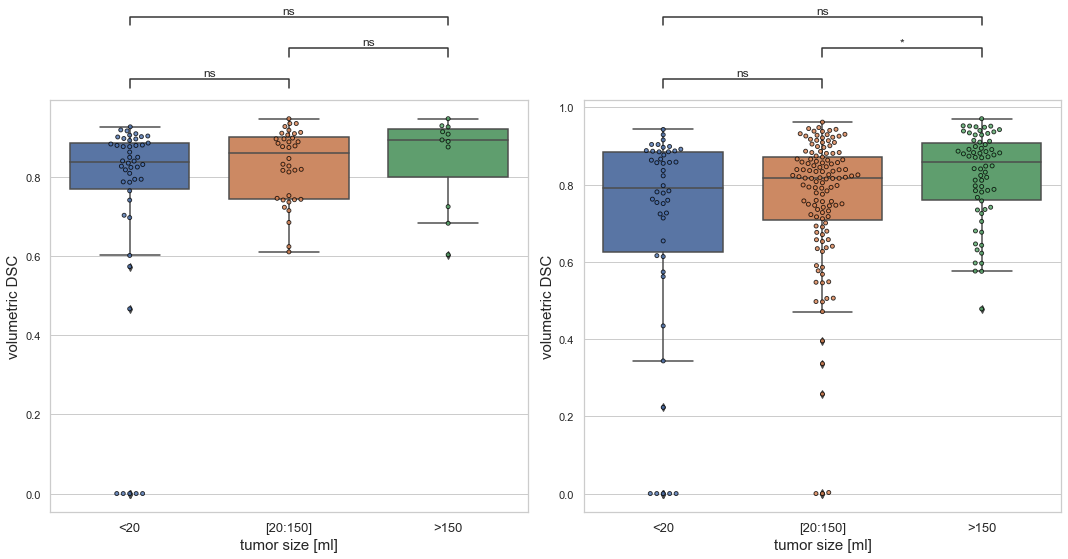

In [25]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
plot_dice_reg_tum_vol(tum_vol_df)
plt.subplot(122)
plot_dice_reg_tum_vol(tum_vol_df_val)
plt.tight_layout()

print('-'*80)
print('Test median <%s : '%tv_thresholds[0],np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='<%s'%tv_thresholds[0],'3d_dice']),
      scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='<%s'%tv_thresholds[0],'3d_dice']))
print('Val median <%s : '%tv_thresholds[0],np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<%s'%tv_thresholds[0],'3d_dice']),
      scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<%s'%tv_thresholds[0],'3d_dice']))
print('-'*80)
print('Test median [%s:%s] :'%(tv_thresholds[0],tv_thresholds[1]),np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'3d_dice']),
      scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'3d_dice']))
print('Val median [%s:%s] :'%(tv_thresholds[0],tv_thresholds[1]),np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'3d_dice']),
      scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[%s:%s]'%(tv_thresholds[0],tv_thresholds[1]),'3d_dice']))
print('-'*80)
print('Test median >%s :'%tv_thresholds[1],np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='>%s'%tv_thresholds[1],'3d_dice']),
      scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='>%s'%tv_thresholds[1],'3d_dice']))
print('Val median >%s :'%tv_thresholds[1],np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>%s'%tv_thresholds[1],'3d_dice']),
      scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>%s'%tv_thresholds[1],'3d_dice']))



### Performance with regards to tumor volume and complexity label

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

[20:150]_0 v.s. [20:150]_1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.520e+02
<20_0 v.s. <20_1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.160e+02
>150_0 v.s. >150_1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
[20:150]_1 v.s. >150_1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+01
<20_0 v.s. >150_0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.000e+00
<20_1 v.s. >150_1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.200e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

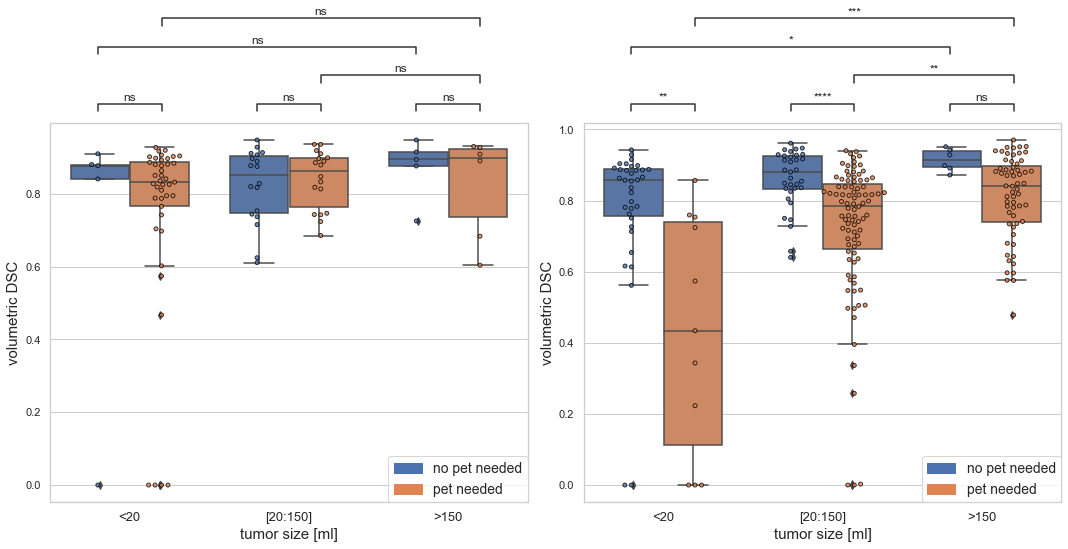

In [28]:
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(15,8))
plt.subplot(121)
plot_dice_reg_tum_vol_hue(tum_vol_df,'pet')
plt.subplot(122)
plot_dice_reg_tum_vol_hue(tum_vol_df_val,'pet')
plt.tight_layout()
plt.savefig('fig2.eps', format='eps')

In [17]:
print('-'*80)
print('Category (Tum. vol. >150 ml, no pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='>150'][tum_vol_df['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='>150'][tum_vol_df['pet']==0]['3d_dice'])))
print('Category (Tum. vol. >150 ml, no pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>150'][tum_vol_df_val['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>150'][tum_vol_df_val['pet']==0]['3d_dice'])))
print('-'*80)
print('Category (Tum. vol. >150 ml, pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='>150'][tum_vol_df['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='>150'][tum_vol_df['pet']==1]['3d_dice'])))
print('Category (Tum. vol. >150 ml, pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>150'][tum_vol_df_val['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='>150'][tum_vol_df_val['pet']==1]['3d_dice'])))
print('-'*80)
print('Category (Tum. vol. [20:150], no pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='[20:150]'][tum_vol_df['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='[20:150]'][tum_vol_df['pet']==0]['3d_dice'])))
print('Category (Tum. vol. [20:150], no pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[20:150]'][tum_vol_df_val['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[20:150]'][tum_vol_df_val['pet']==0]['3d_dice'])))
print('-'*80)
print('Category (Tum. vol. [20:150], pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='[20:150]'][tum_vol_df['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='[20:150]'][tum_vol_df['pet']==1]['3d_dice'])))
print('Category (Tum. vol. [20:150], pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[20:150]'][tum_vol_df_val['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='[20:150]'][tum_vol_df_val['pet']==1]['3d_dice'])))
print('-'*80)
print('Category (Tum. vol. <20, no pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='<20'][tum_vol_df['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='<20'][tum_vol_df['pet']==0]['3d_dice'])))
print('Category (Tum. vol. <20, no pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<20'][tum_vol_df_val['pet']==0]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<20'][tum_vol_df_val['pet']==0]['3d_dice'])))
print('-'*80)
print('Category (Tum. vol. <20, pet needed): test averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df.loc[tum_vol_df['tum_vol']=='<20'][tum_vol_df['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df.loc[tum_vol_df['tum_vol']=='<20'][tum_vol_df['pet']==1]['3d_dice'])))
print('Category (Tum. vol. <20, pet needed): val averaged DSC = %s, IQR = %s '%(np.median(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<20'][tum_vol_df_val['pet']==1]['3d_dice']),scipy.stats.iqr(tum_vol_df_val.loc[tum_vol_df_val['tum_vol']=='<20'][tum_vol_df_val['pet']==1]['3d_dice'])))
print('-'*80)


--------------------------------------------------------------------------------
Category (Tum. vol. >150 ml, no pet needed): test averaged DSC = 0.894126732400193, IQR = 0.03859835537666012 
Category (Tum. vol. >150 ml, no pet needed): val averaged DSC = 0.9133748026928714, IQR = 0.04572376615083029 
--------------------------------------------------------------------------------
Category (Tum. vol. >150 ml, pet needed): test averaged DSC = 0.8995595642330045, IQR = 0.187337882612573 
Category (Tum. vol. >150 ml, pet needed): val averaged DSC = 0.8407783785670035, IQR = 0.15638199485194715 
--------------------------------------------------------------------------------
Category (Tum. vol. [20:150], no pet needed): test averaged DSC = 0.8516161412380994, IQR = 0.15794231256212732 
Category (Tum. vol. [20:150], no pet needed): val averaged DSC = 0.8807039232083773, IQR = 0.09173018032595603 
--------------------------------------------------------------------------------
Category (Tum.

In [18]:
#test data
dice_test_score = metrics_test['3d_dice'].values
jaccard_test_score = metrics_test['3d_jacc'].values
haussdorff_test_score = metrics_test['h95th'].values
surf_dsc_test = metrics_test['surf_dsc'].values
apl_test = metrics_test['APL'].values/10.0
#val data
dice_val_score = metrics_val['3d_dice'].values
jaccard_val_score = metrics_val['3d_jacc'].values
haussdorff_val_score = metrics_val['h95th'].values
surf_dsc_val = metrics_val['surf_dsc'].values
apl_val = metrics_val['APL'].values/10.0

In [19]:
#Define plot function
sns.set(context='poster', style='whitegrid')
def plot_histograms(dsc,jacc,hausd,surfd,apl):
    plt.figure(figsize=(46,10))
    plt.subplot(151)
    plt.xticks(fontsize=30)
    plt.xlabel('dice coefficient',fontsize=35)
    plt.ylabel('number of images',fontsize=35)
    plt.yticks(fontsize=30)
    pars = plt.hist(dsc,bins=12, edgecolor='black', linewidth=2,alpha=0.75)
    plt.title('Volumetric DSC distr.',fontsize=40)
    plt.text(0,np.max(pars[0])*0.95,'Median score = %s'%str(np.round(np.median(dsc),2)),fontsize=35)
    plt.subplot(152)
    pars = plt.hist(jacc,bins=12, edgecolor='black', linewidth=2,alpha=0.75)
    plt.title('Volumetric Jaccard distr.',fontsize=40)
    plt.text(0,np.max(pars[0])*0.95,'Median score = %s'%str(np.round(np.median(jacc),2)),fontsize=35)
    plt.xticks(fontsize=30)
    plt.xlabel('jaccard index',fontsize=35)
    plt.ylabel('number of images',fontsize=35)
    plt.yticks(fontsize=30)
    plt.subplot(153)
    filt_hausdorf = list(filter(lambda x: x<100 , hausd))
    pars = plt.hist(filt_hausdorf,bins=12, edgecolor='black', linewidth=2,alpha=0.75)
    plt.title('95th Hausdorff distance distr.',fontsize=40)
    plt.text(0,np.max(pars[0])*0.95,'Median score = %s mm'%str(np.round(np.median(filt_hausdorf),2)),fontsize=35)
    plt.xticks(fontsize=30)
    plt.xlabel('mm',fontsize=35)
    plt.ylabel('number of images',fontsize=35)
    plt.yticks(fontsize=30)
    plt.subplot(154)
    pars = plt.hist(surfd,bins=12, edgecolor='black', linewidth=2,alpha=0.75)
    plt.title('Surface DSC distr.',fontsize=40)
    plt.text(0,np.max(pars[0])*0.95,'Median score = %s'%str(np.round(np.median(surfd),2)),fontsize=35)
    plt.xticks(fontsize=30)
    plt.xlabel('surface dsc',fontsize=35)
    plt.ylabel('number of images',fontsize=35)
    plt.yticks(fontsize=30)
    plt.subplot(155)
    filt_apl = list(filter(lambda x: x<5000 , apl))
    pars = plt.hist(filt_apl,bins=12, edgecolor='black', linewidth=2,alpha=0.75)
    plt.title('APL distr.',fontsize=40)
    plt.text(0,np.max(pars[0])*0.95,'Median score = %s cm'%str(np.round(np.median(apl),2)),fontsize=35)
    plt.xticks(fontsize=30)
    plt.xlabel('cm',fontsize=35)
    plt.ylabel('number of images',fontsize=35)
    plt.yticks(fontsize=30)
    #plt.tight_layout()

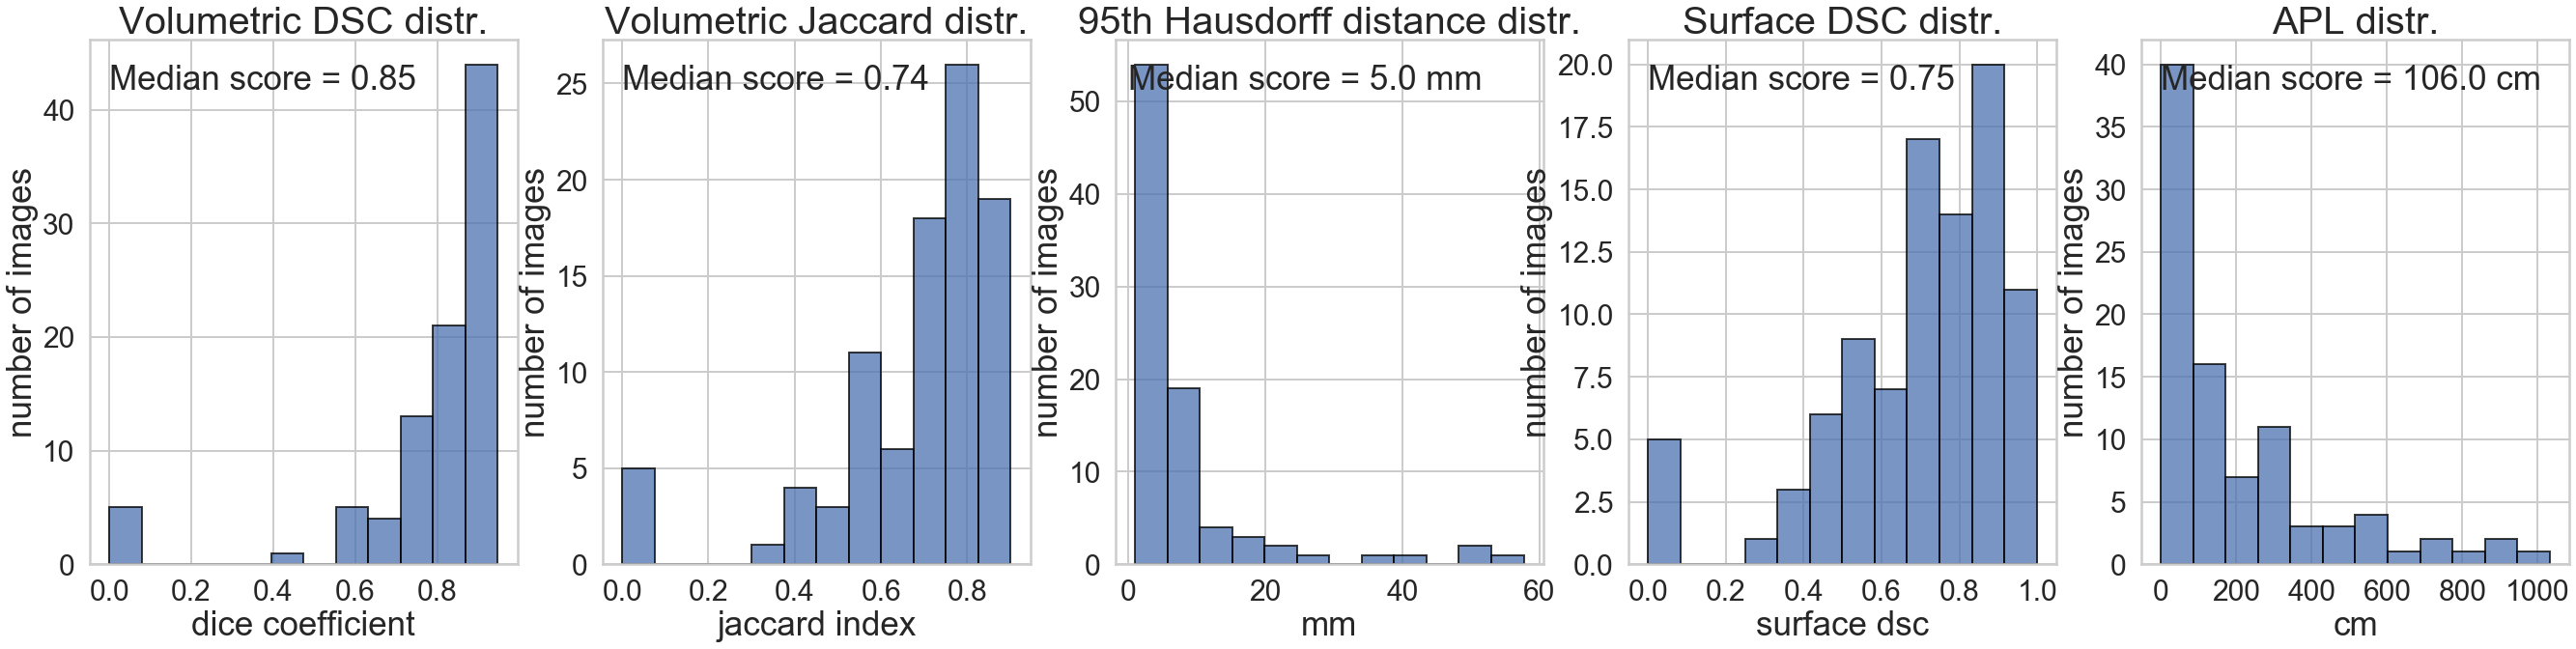

In [20]:
#test results
plot_histograms(dice_test_score,jaccard_test_score,haussdorff_test_score,surf_dsc_test,apl_test)


In [21]:
print('Test median JI:',np.median(jaccard_test_score),scipy.stats.iqr(jaccard_test_score))
print('Test median APL:',np.median(apl_test),scipy.stats.iqr(apl_test))
print('Test median SurfDSC:',np.median(surf_dsc_test),scipy.stats.iqr(surf_dsc_test))

Test median JI: 0.7391304347826086 0.21900168265630648
Test median APL: 106.0 274.4
Test median SurfDSC: 0.7476523237525788 0.2862960728645835


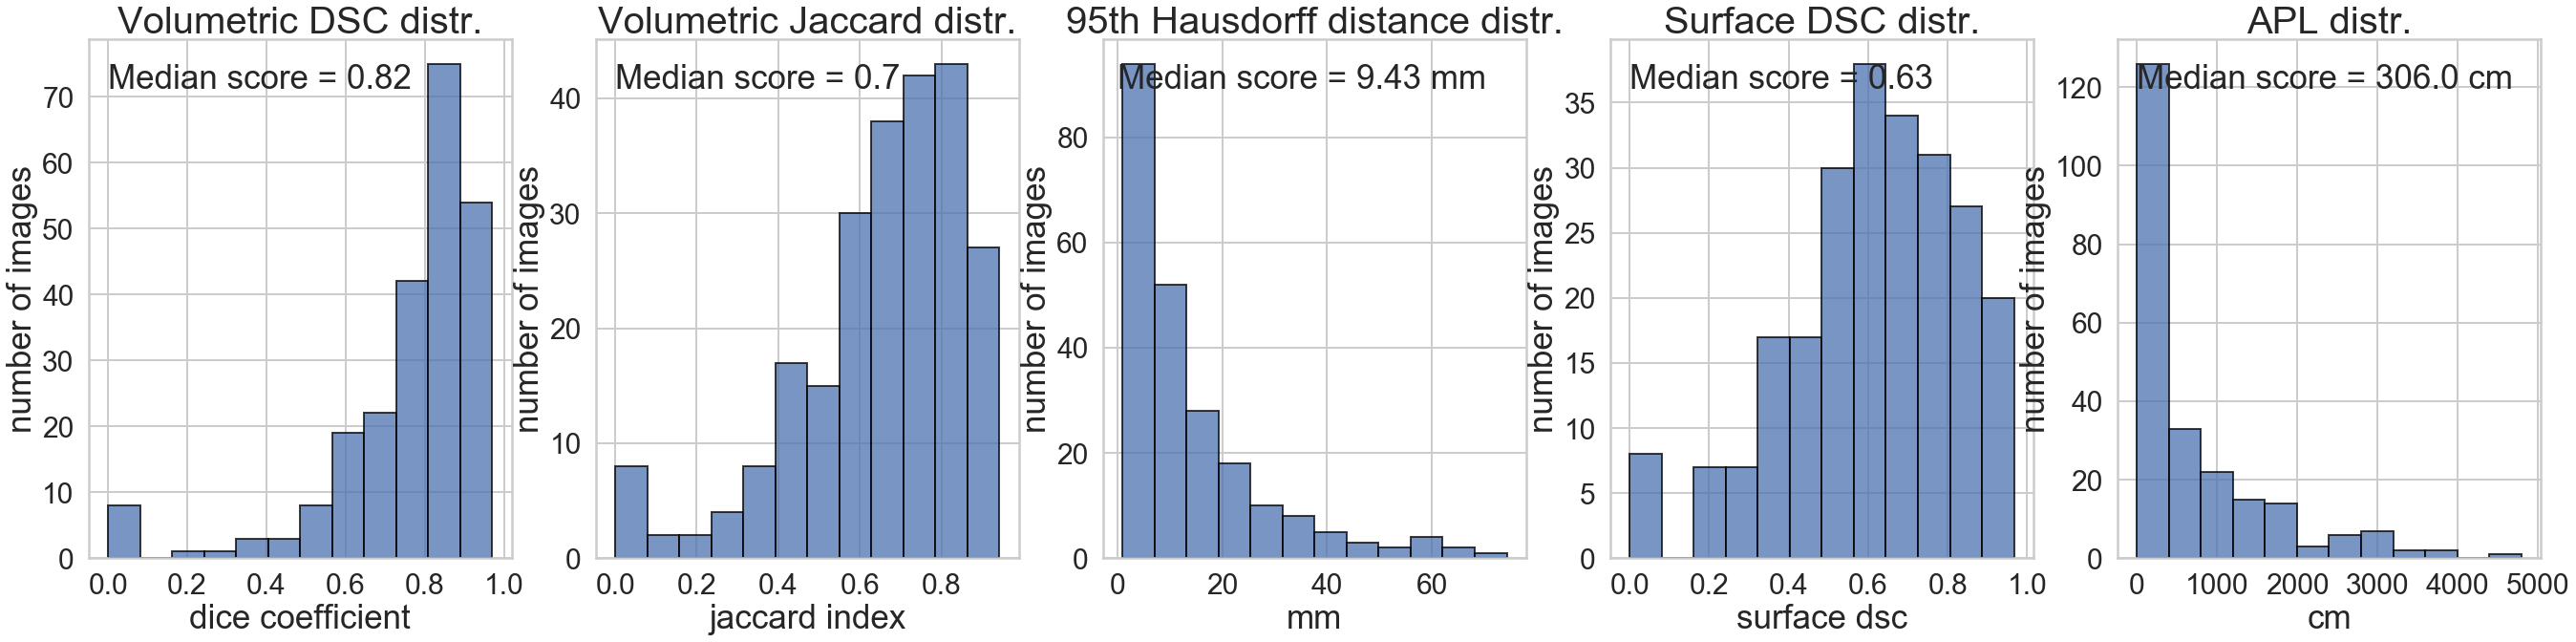

In [22]:
#test results
plot_histograms(dice_val_score,jaccard_val_score,haussdorff_val_score,surf_dsc_val,apl_val)


In [23]:
print('Test median JI:',np.median(jaccard_val_score),scipy.stats.iqr(jaccard_val_score))
print('Test median APL:',np.median(apl_val),scipy.stats.iqr(apl_val))
print('Test median SurfDSC:',np.median(surf_dsc_val),scipy.stats.iqr(surf_dsc_val))

Test median JI: 0.6967414426180338 0.23638465729252922
Test median APL: 306.0 984.75
Test median SurfDSC: 0.6314592449131627 0.2800334072952752
